In [1]:
!pip install rdkit-pypi==2022.3.1.1

     ---------------------------------------- 0.0/13.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/13.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/13.4 MB ? eta -:--:--
     --------------------------------------- 0.0/13.4 MB 262.6 kB/s eta 0:00:52
     --------------------------------------- 0.0/13.4 MB 281.8 kB/s eta 0:00:48
     --------------------------------------- 0.1/13.4 MB 479.1 kB/s eta 0:00:28
      -------------------------------------- 0.2/13.4 MB 908.0 kB/s eta 0:00:15
      --------------------------------------- 0.3/13.4 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/13.4 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/13.4 MB 1.7 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/13.4 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/13.4 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/13.4 MB 2.7 MB/s et

In [15]:
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

**Import the dataset**

In [ ]:
dataset = pd.read_csv('/content/IDO1_PC_SubStructure.csv')
dataset.head(10)

In [8]:
# Include 2D structure of molecules
# https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/PandasTools.py

from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(dataset,'SMILES', 'Structure')

In [ ]:
dataset.head()

<div style= "color:green;font-size:30px; padding : 15px">
Calculating Tanimoto coefficient using RDKit
</div>

In [16]:
rdkbi = {}
Rdk = AllChem.RDKFingerprint(dataset.Structure[0], maxPath=5, fpSize=512, bitInfo=rdkbi)
print(np.array(AllChem.RDKFingerprint(mol=dataset.Structure[0], maxPath=5, fpSize=512)))

[0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1
 1 0 1 0 1 0 0 1 1 0 0 1 

In [17]:
# Calculate the fingerprints of all the compounds(total 5173)
all_Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) for mol in dataset.Structure]

In [18]:
len(all_Mfpts)

5173

**Tính Tc của tập dữ liệu**


In [12]:
# Let us use all rows of the data to calculate Tanimoto coefficient in matrix form
dataset_matrix =dataset[:]

In [31]:
# Big Credit for this website: https://www.macinchem.org/reviews/molsimilar/SimilarMyMolecules.html
# Modified their code to my data
# Calculate Morgan fingerprints and store them in a list
fpts_list = []

for mol in dataset_matrix['Structure']:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    fpts_list.append(fp)

# put the fingerprint list into the data frame
dataset_matrix['m_fpt2']= fpts_list

#----------------------------------------------
Tc_list = []
for item1 in fpts_list:
    for item2 in fpts_list:
      sim = DataStructs.TanimotoSimilarity(item1, item2)
      Tc_list.append(sim)

In [34]:
len(fpts_list)

5173

In [36]:
Tc_list

[1.0,
 0.2033898305084746,
 0.2033898305084746,
 0.14285714285714285,
 0.21666666666666667,
 0.12790697674418605,
 0.12790697674418605,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.13636363636363635,
 0.13636363636363635,
 0.13636363636363635,
 0.13636363636363635,
 0.2033898305084746,
 0.2033898305084746,
 0.2033898305084746,
 0.2033898305084746,
 0.2033898305084746,
 0.13333333333333333,
 0.16216216216216217,
 0.17073170731707318,
 0.16216216216216217,
 0.16216216216216217,
 0.16216216216216217,
 0.16216216216216217,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.1590909090909091,
 0.13157894736842105,
 0.13157894736842105,
 0.13157894736842105,
 0.13157894736842105,
 0.13157894736842105,
 0.14634146341463414,
 0.15,
 0.15217391304347827,
 0.15217391304347827,
 0.34285714285714286,
 0.34285714285714286,
 0.21951219512195122,
 0.096153

In [35]:
len(Tc_list)

26759929

**Biểu đồ phân bố TC của tập dữ liệu IDO1**


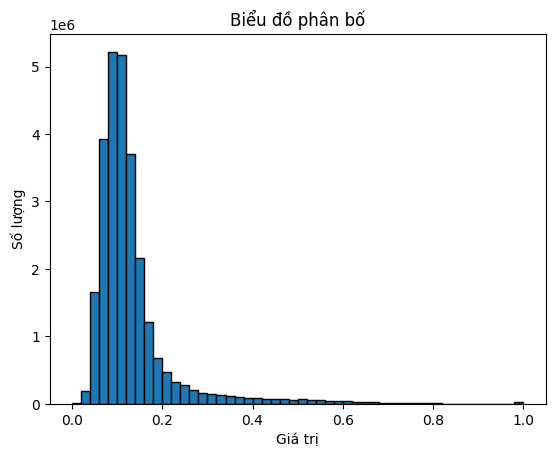

In [38]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ histogram
plt.hist(Tc_list, bins=50, edgecolor='black')

# Đặt tên cho trục x, y và tiêu đề
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')
plt.title('Biểu đồ phân bố')

# Hiển thị biểu đồ
plt.show()
